В этом блокноте мы обсудим частотное представление изображений. Кроме того, мы увидим, как преобразования в частотной области меняют исходное изображение.



Для начала установим необходимую версию библиотеки и подключим то, чем будем пользоватья в дальнейшем.

In [1]:
!pip install opencv-python==4.4.0.42

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 MB 7.1 MB/s eta 0:00:0000:0100:01m
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [3840 lines of output]
      Ignoring numpy: markers 'python_version == "3.5"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.6"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7"' don't match your environment
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.0 MB/s eta 0:00:00
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 KB 14.6 MB/s eta 0:00:00
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 8.1 MB/s eta 0:00:00
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.3 MB/s eta 0:00:00
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 9.3 MB/s eta 0:00:00
        Preparing metadat

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300

# **Преобразование Фурье в Python и фильтрация в чатотной области**

Начнем с того, что научимся осуществлять дикретное преобразование Фурье средствами Python.

Для начала считаем черно-белое изображение и выведем его на экран. Если исходное изображение оказывается цветным, то придется работать с каждым его каналом отдельно.

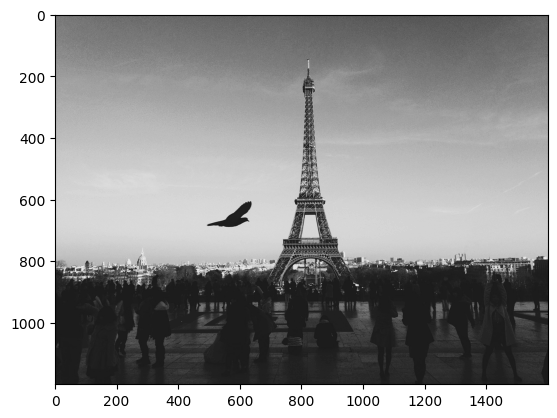

In [6]:
img = cv2.imread('./images/img.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray')

+ Проведем преобразование Фурье и визуализируем результат. Двумерное дискретное преобразование Фурье (на самом деле — быстрое преобразование Фурье или fast Fourier transform) в библиотеке `numpy` может быть выполнено с использованием функции `np.fft.fft2()`, аргументом которой служит исходное изображение.
+ Hàm này tính toán Biến đổi Fourier rời rạc n chiều trên bất kỳ trục nào trong mảng M chiều bằng Biến đổi Fourier nhanh (FFT). 
+ Theo mặc định, biến đổi được tính toán trên hai trục cuối cùng của mảng đầu vào, tức là FFT 2 chiều
+ Documentation [numpy](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html)

In [7]:
f = np.fft.fft2(img)
print(f[10, 12])

(-303609.54502521426-287581.0858228238j)


В результатемы получаем двумерную матрицу того же размера, что и матрица, отвечающая исходному изображению, элементы которой теперь, вообще говоря, комплексные.

Для удобства визуализации (что общепринято), переместим компоненту, отвечающую нулевой частоте (`f[0][0]`), в центр. Это можно сделать автоматичеки, используя функцию `np.fft.fftshift()`, аргументом которой служит полученное ранее преобразование Фурье `f`. Легко проверить, что так как изображение имеет размеры $1200 \times 1600$, то `fshift[600][800] = f[0][0]`.

+ Để thuận tiện cho việc trực quan hóa (thường được chấp nhận), chúng tôi di chuyển thành phần tương ứng với tần số bằng không (`f[0][0]`) vào giữa.
+ Điều này có thể được thực hiện tự động bằng cách sử dụng hàm `np.fft.fftshift()`, có đối số là biến đổi Fourier thu được trước đó `f`
+ Image size = (1200,1600) => `f[0][0] = fshift[600][800]`

In [8]:
fshift = np.fft.fftshift(f)
# Check this
print(fshift[600][800] == f[0][0])

True


Для визуализации преобразования Фурье, заменим все элементы матрицы их модулями — амплитудами. И... 

+ Để trực quan hóa biến đổi Fourier, chúng ta sẽ thay thế tất cả các phần tử của ma trận bằng các mô-đun - biên độ của chúng. VÀ...

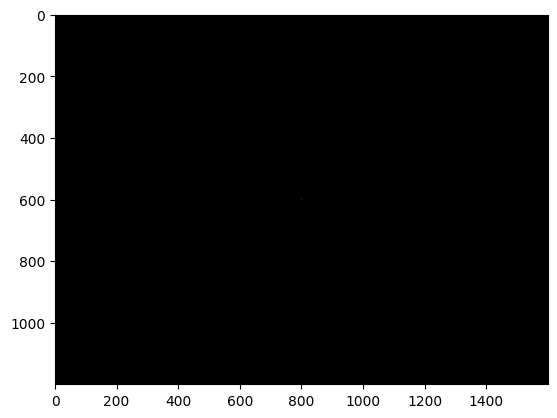

In [9]:
magnitude_spectrum = np.abs(fshift)
plt.imshow(magnitude_spectrum, cmap = 'gray')

Ничего не видно, кроме некоторого белого вкрапления посередине. Все дело в том, что различие в значениях амплитуд очень велико.

+ Không có gì có thể nhìn thấy, ngoại trừ một số đốm trắng ở giữa. Vấn đề là sự khác biệt về giá trị của các biên độ là rất lớn.

In [10]:
print('min:', np.min(magnitude_spectrum), 'max:', np.max(magnitude_spectrum))
print(magnitude_spectrum[600][800])

min: 10.815443187335951 max: 242373590.0
242373590.0


Отметим отдельно, что максимальная амплитуда отвечает нулевой частоте (в центре смещенного преобразования Фурье). Применим логарифмическое шкалирование (общепринятный стандартный прием при визуализации преобразования Фурье). Сами преобразования могут несколько отличатья, но это не будет давать существенных различий при визуализации. Единица под логарифмом добавлена для того, чтобы избежать очень маленьких значений логарифма, когда его аргумент близок к $0$ (хотя в нашей ситуации такого не будет, что видно из выведенного выше значения `min`).
+ Lưu ý riêng rằng biên độ cực đại tương ứng với tần số bằng không (tại tâm của biến đổi Fourier đã dịch chuyển). Hãy áp dụng phép chia tỷ lệ logarit (một kỹ thuật tiêu chuẩn thường được chấp nhận để trực quan hóa phép biến đổi Fourier). Bản thân các phép biến đổi có thể hơi khác một chút, nhưng điều này sẽ không tạo ra sự khác biệt đáng kể khi kết xuất. Đơn vị dưới logarit được thêm vào để tránh các giá trị rất nhỏ của logarit khi đối số của nó gần bằng $0$ (mặc dù điều này sẽ không xảy ra trong trường hợp của chúng ta, như có thể thấy từ giá trị `min` ở trên).

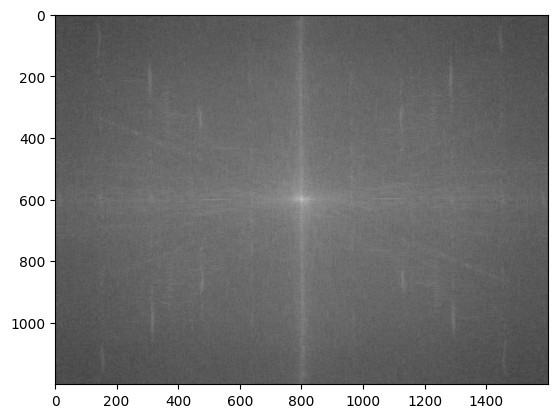

In [12]:
# add 1 for advoid logarit == 0
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')

Итак, что мы видим на полученной картинке? Чем светлее точка — тем больше у нее амплитуда, то есть тем больше информации она несет. Чем дальше мы удаляемся от центра — тем  выше частота. Светлые регионы отвечают более низким частотам, а темные — более высоким. Мы видим, что в общем и целом низкие частоты несут больше информации, чем высокие. 

За что отвечает частота? Высокие частоты отвечают за резкие изменения яркости пикселей, а низкие, наоборот, за плавные изменения яркости пикселей. 

+ Vì vậy, những gì chúng ta nhìn thấy trong bức tranh kết quả? Điểm càng sáng thì biên độ của nó càng lớn, nghĩa là nó mang càng nhiều thông tin. Chúng ta di chuyển càng xa trung tâm thì tần số càng cao. Vùng sáng tương ứng với tần số thấp hơn, trong khi vùng tối tương ứng với tần số cao hơn. 
+ Chúng tôi thấy rằng, nói chung, tần số thấp mang nhiều thông tin hơn tần số cao.
+ Tần số cao chịu trách nhiệm cho những thay đổi rõ nét về độ sáng của pixel.
+ Tần số thấp, ngược lại, chịu trách nhiệm cho những thay đổi mượt mà về độ sáng của pixel.

Давайте теперь попробуем убрать основные низкие частоты — занулим их амплитуду, присвоив всем элементам матрицы `fshift`, близким к центру, значение $0$.
+ Bây giờ, hãy thử loại bỏ các tần số thấp chính - đặt biên độ của chúng thành 0 bằng cách gán giá trị $0$ cho tất cả các phần tử của ma trận `fshift` gần trung tâm.

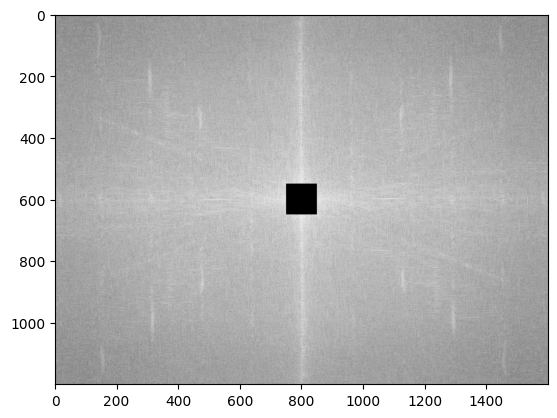

In [14]:
fshift[600 -  50 : 600 + 50, 800-50 : 800 + 50] = 0
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')

Чтобы получить разумную картинку, применим обратное преобразование Фурье (быстрое — inverse fast Fourier transform), используя функцию `np.fft.ifft2()`, аргументом которой служит преобразование Фурье. Предварительно нужно "сдвинуть все назад", используя `np.fft.ifftshift()`.
+ Để có được một bức tranh hợp lý, chúng ta áp dụng biến đổi Fourier nhanh nghịch đảo bằng cách sử dụng hàm `np.fft.ifft2()`, đối số của nó là biến đổi Fourier.
+ Trước tiên, bạn cần "chuyển mọi thứ trở lại" bằng cách sử dụng `np.fft.ifftshift()`.

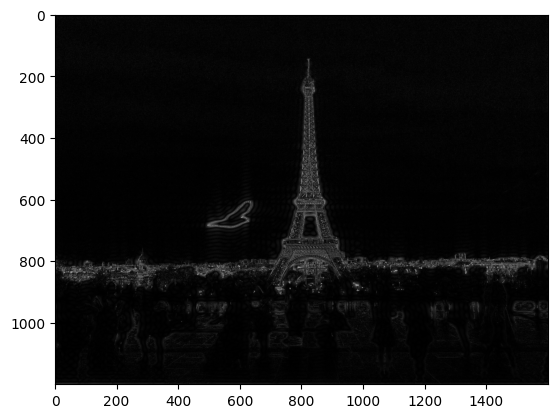

In [15]:
# fftshift : Shift zero-frequency component to the center of the spectrum.
f_ishift = np.fft.ifftshift(fshift)
# Compute the 2-dimensional inverse discrete Fourier Transform.
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')

Мы видим, как отчетливо стали видны границы изображений: вся монохромность ушла. Тем самым, мы легко сегментировали Эйфелеву башню, летящую птицу и границу городчких кварталов, уходящих за горизонт.
+ Chúng tôi thấy các đường viền của hình ảnh đã trở nên rõ ràng như thế nào: tất cả đơn sắc đã biến mất. Do đó, chúng tôi dễ dàng phân chia tháp Eiffel, một con chim đang bay và đường viền của các khối thành phố vượt ra ngoài đường chân trời.

Логично задатья вопросом: а чему отвечают вертикальная и горизонтальная линии, проходящие через центр изображения амплитуд? Давайте посмотрим, что изменится, если мы их затемним. Сначала проверим, что все сделали правильно.
+ Thật hợp lý khi đặt câu hỏi: các đường thẳng đứng và nằm ngang đi qua tâm của hình ảnh biên độ tương ứng với điều gì? Hãy xem những gì thay đổi nếu chúng ta làm tối chúng. Trước tiên, hãy kiểm tra xem mọi thứ đã được thực hiện chính xác chưa.

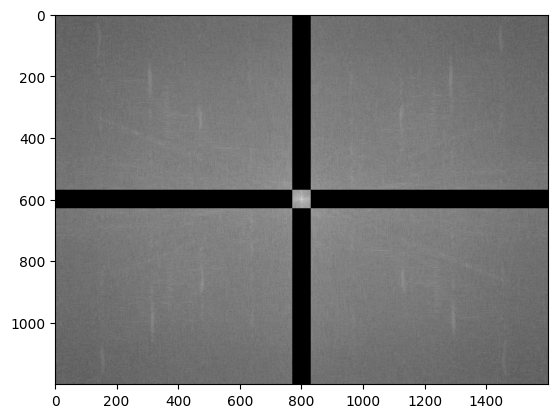

In [16]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fshift[600 - 30 : 600 + 30, 0 : 800 - 30] = fshift[600 - 30 : 600 + 30, 800+30 : 1600] = 0
fshift[0 : 600 - 30, 800 - 30 : 800 + 30] = fshift[600 + 30 : 1200, 800 - 30 : 800 + 30] = 0
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')

Вернемся к привычному для глаза изображению.

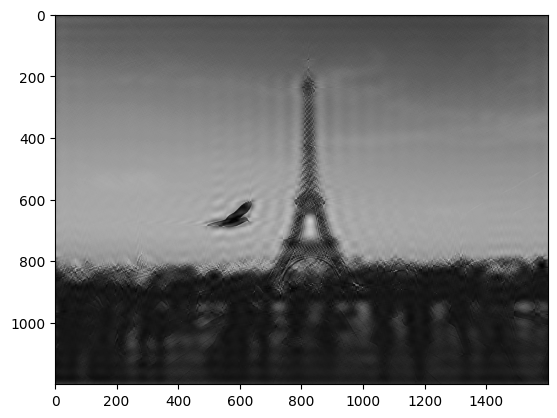

In [17]:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')

Итак, мы увеличили резкость выделяющихся объектов.
+ Vì vậy, chúng tôi đã tăng độ sắc nét của các đối tượng nổi bật.

# **Градиенты изображений и детектирование границ**
# **Độ dốc hình ảnh và phát hiện cạnh**


Для определения границ изображения, бывает полезно построить так называемые градиенты изображений. Для использования оператора Лапласа, достаточно воспользоваться следующим кодом:
+ Để xác định đường viền của hình ảnh, có thể hữu ích khi xây dựng cái gọi là độ dốc hình ảnh. Để sử dụng toán tử Laplace, chỉ cần sử dụng đoạn mã sau:

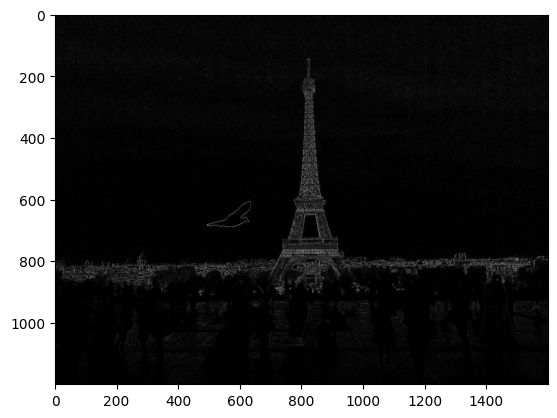

In [20]:
img = cv2.imread('./images/img.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# defind edge of image with operator Laplace
laplacian = cv2.Laplacian(img, -1)
plt.imshow(laplacian,cmap = 'gray')

Видно, как четко отображаются границы всех объектов. В лекциях также рассказывается про операторы Собеля. Ниже можно видеть результаты применения этих операторов отдельно по первой координате, по второй, и по двум сразу.
+ Bạn có thể thấy ranh giới của tất cả các đối tượng được hiển thị rõ ràng như thế nào. 
+ Các bài giảng cũng nói về toán tử Sobel. 
+ Dưới đây, bạn có thể xem kết quả của việc áp dụng riêng các toán tử này cho tọa độ đầu tiên, cho tọa độ thứ hai và cho hai tọa độ cùng một lúc.

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fd979b99510>)

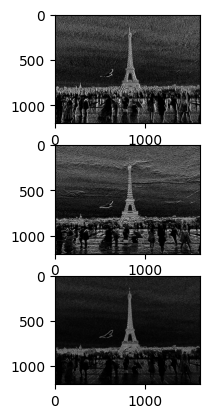

In [21]:
sobel_x = cv2.Sobel(img, -1, 1, 0, ksize = 5)
sobel_y = cv2.Sobel(img, -1, 0, 1, ksize = 5)
sobel_full = cv2.Sobel(img, -1, 1, 1, ksize = 5)
plt.subplot(3,1,1),plt.imshow(sobel_x, cmap = 'gray')
plt.subplot(3,1,2),plt.imshow(sobel_y, cmap = 'gray')
plt.subplot(3,1,3),plt.imshow(sobel_full, cmap = 'gray')

Алгоритм детектора краев Кенни позволяет успешно находить краяи зображения. Применить его можно, например, следующим образом.
+ Thuật toán phát hiện cạnh Kenny có thể tìm thành công các cạnh của hình ảnh. Nó có thể được áp dụng, ví dụ, như sau.

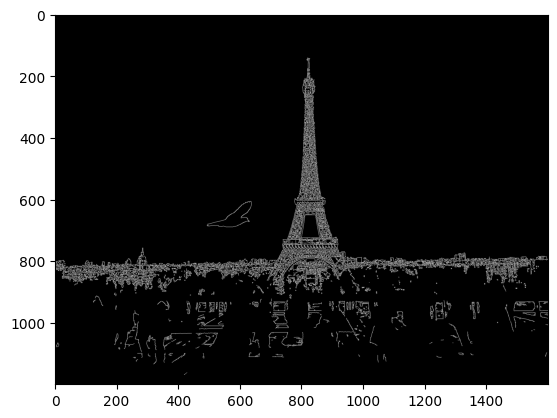

In [22]:
canny = cv2.Canny(img, 100, 200)
plt.imshow(canny, cmap = 'gray')